<a href="https://colab.research.google.com/github/prabhasg03/academic_work/blob/Deep-Learning-Lab/Task%209/Task%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 9:
Design a Neural network with various optimization algorithms and analyse their performance using Keras
# Program

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from tensorflow.keras.utils import to_categorical

In [48]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [50]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
def create_model():
  model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
  ])
  return model

In [51]:
# Define different optimizers
optimizers = {
'SGD': SGD(),
'Adam': Adam(),
'RMSprop': RMSprop(),
'Adagrad': Adagrad()
}

In [52]:
# Store results
results = {}

In [53]:
for opt_name, opt in optimizers.items():  # Iterate through optimizer classes
    print(f'Training with {opt_name} optimizer...')
    model = create_model()
    model.compile(optimizer=opt_name, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    results[opt_name] = {
        'accuracy': test_accuracy,
        'loss': test_loss,
        'history': history.history
    }
    print(f'{opt_name} Test Accuracy: {test_accuracy:.4f}')

Training with SGD optimizer...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6919 - loss: 1.1340 - val_accuracy: 0.9036 - val_loss: 0.3383
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9051 - loss: 0.3391 - val_accuracy: 0.9217 - val_loss: 0.2713
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9200 - loss: 0.2764 - val_accuracy: 0.9351 - val_loss: 0.2320
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9359 - loss: 0.2273 - val_accuracy: 0.9427 - val_loss: 0.2057
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9393 - loss: 0.2077 - val_accuracy: 0.9468 - val_loss: 0.1891
SGD Test Accuracy: 0.9446
Training with Adam optimizer...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8703 - loss: 0.4480 - val_accuracy: 0.9631 - val_loss: 0.1293
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9638 - loss: 0.1226 - val_accuracy: 0.9679 - val_loss: 0.1061
Epoch 3/

In [54]:
# Plot accuracy for each optimizer
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

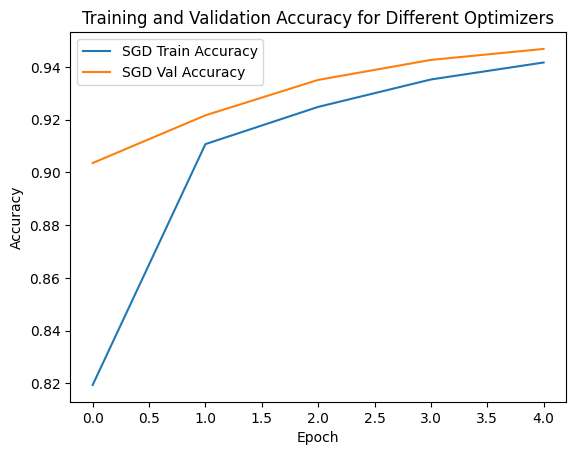

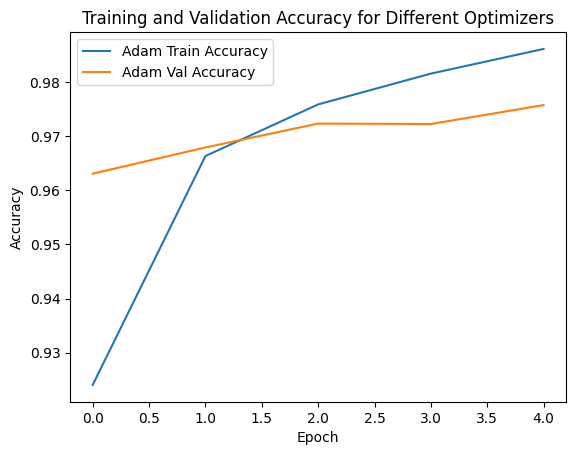

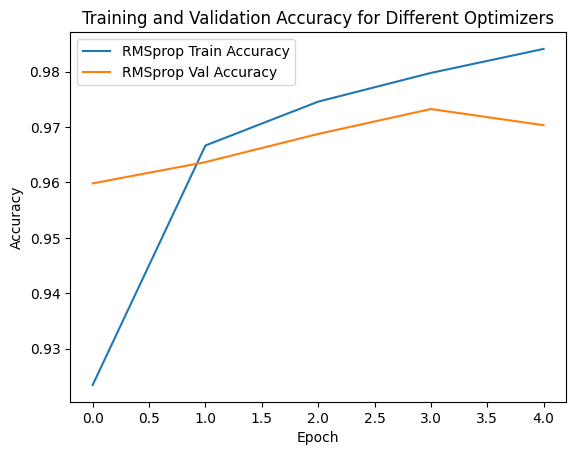

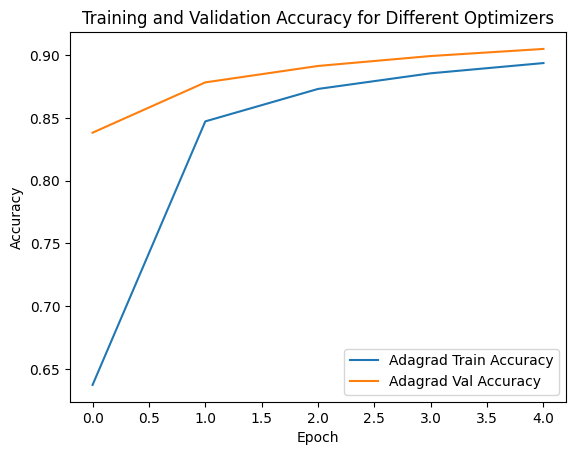

In [55]:
for opt_name in optimizers.keys():
  plt.plot(results[opt_name]['history']['accuracy'], label=f"{opt_name} Train Accuracy")
  plt.plot(results[opt_name]['history']['val_accuracy'], label=f"{opt_name} Val Accuracy")
  plt.title('Training and Validation Accuracy for Different Optimizers')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

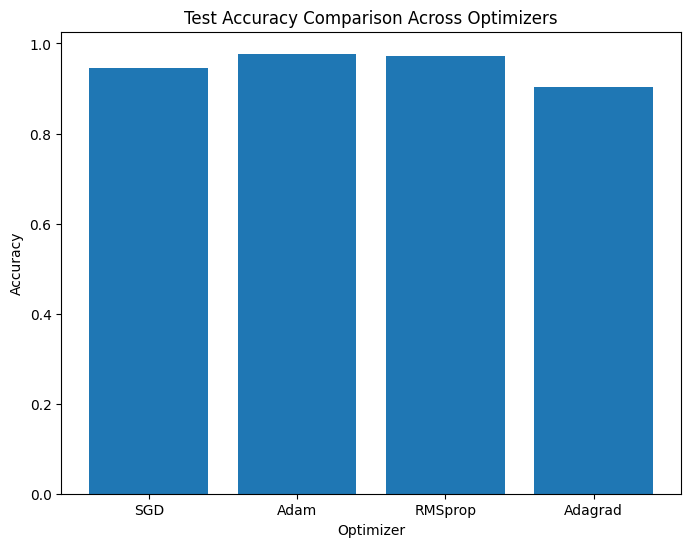

In [56]:
# Plot test accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), [results[opt]['accuracy'] for opt in optimizers.keys()])
plt.title('Test Accuracy Comparison Across Optimizers')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.show()